## ISYS 5103 - Assignment 5

### Instructions: For each question below, you will potentially be asked to:
    - Predict - Run - Investigate: 
        - examine the code and write down in a markdown cell what you think the code will do
        - run the code and see if your prediction is right or wrong.  If wrong, that is okay. 
        - if your prediction was wrong, diagnose why, and document why (if you don't know, document that as well)
    - Modify:
        - take existing code (found in the Lesson 1e PowerPoint) and modify it to answer the below questions. 
    - Make:
        - take what we have covered in class and create a piece of code to answer the question.
        - most of this will be taking code that already exists from class or in the assignment and adapting it to a new problem

#### Submission: Print this Jupyter Notebook as a PDF document and submit it to BlackBoard (filename should be NAME_Assignment5.pdf). 

<div style="background-color: #9D2235; color: white; padding: 10px;border: 2px solid #000000; ">
    
 ## Enter Your Name and Class Section:
    
</div>

In [1]:
# Run this block of code and enter your name
name = input("Enter your name: ")

print("Name =", name + " Good Luck on your 5th Assignment!")

Enter your name:  Isaiah Molina


Name = Isaiah Molina Good Luck on your 5th Assignment!


<div style="background-color: #9D2235; color: white; padding: 10px; border: 2px solid #000000;">
  
# Pivots (Excel & Pandas) 
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 1 - Using Excel, create a Pivot table from Band_Performances.csv

 - make sure it has at least one Row and one Column dimension 
 - make sure it has at least one Measure (e.g., TotalRev (sum, avg), Counts, Unique Counts)

    
</div>   


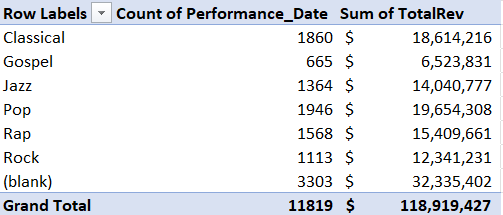


<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 2 - Using Pandas, re-create a Pivot table from Band_Performances.csv

 - make sure you still have Band_Performances.csv, and import it into a DataFrame 
 - once into your DataFrame, recreate the Pivot Table using the pivot_table capability in Pandas
 - I recommend that you take all the hard work you did in assignment 4 (cleaning, adding columns, etc.) and build on it.
    
</div>   

In [8]:
#Import Python Libraries
import pandas as pd #data analysis library
import numpy as np #use for working with numeric/math functions

# Create a blank DataFrame
df = pd.DataFrame()

# Load data from the CSV file into the DataFrame 

csv_file = "Band_Performances.csv"
df = pd.read_csv(csv_file) 

# Recreate the Pivot Table (please mimic it as close as possible, even try formatting measures)

pivot_table = pd.pivot_table(df,
                             values=['Performance_Date', 'TotalRev'],
                             index=['Genre'],
                             aggfunc={'Performance_Date': 'count', 'TotalRev': np.sum},
                             fill_value=0,
                             margins=True,
                             margins_name="GrandTotal")
pivot_table['TotalRev'] = pivot_table['TotalRev'].apply(lambda x: f"${int(x):,}")

print(pivot_table)


            Performance_Date     TotalRev
Genre                                    
Classical               1860  $18,614,216
Gospel                   665   $6,523,830
Jazz                    1364  $14,040,776
Pop                     1946  $19,654,308
Rap                     1568  $15,409,661
Rock                    1113  $12,341,230
GrandTotal              8516  $86,584,024


<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 3 - Using Matplotlib, create a chart of your choice using your DataFrame.

 - it does not have to be a chart I created in the PowerPoint.   
 - I recommend you to be creative, explore the Gallery provided by Matplotlib and find something that you like
 - I recommend that you take all the hard work you did in assignment 4 (cleaning, adding columns, etc.) and build on it. 
 - Charting is a great use of the Grouper/Binned columns you created.
 - Tip = if creating trend charts by datetime (month, qtr) you may want to create a sorted DataFrame for your chart
    
</div>   

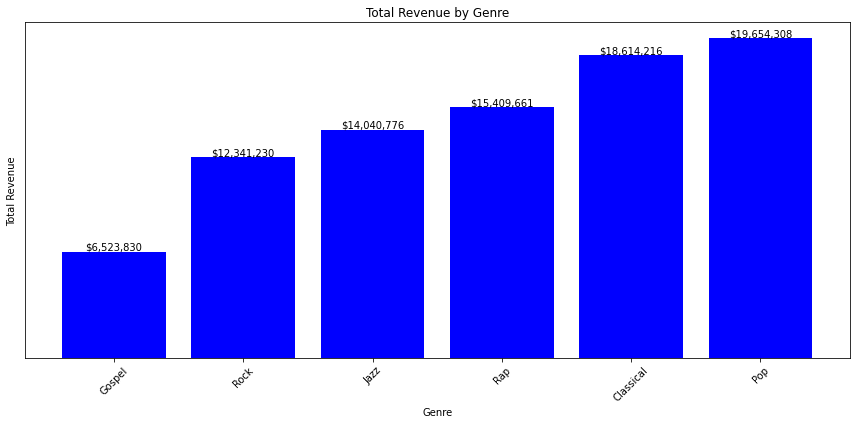

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

#Create pivot table
pivot_table = pd.pivot_table(df,
                             values=['Performance_Date', 'TotalRev'],
                             index=['Genre'],
                             aggfunc={'Performance_Date': 'count', 'TotalRev': np.sum},
                             fill_value=0)

#Sort from small to largest revenue
pivot_table.sort_values(by='TotalRev', inplace=True)

#Create barchart
plt.figure(figsize=(12, 6))
bars = plt.bar(pivot_table.index, pivot_table['TotalRev'], color='blue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Genre')
plt.xticks(rotation=45)
plt.yticks([])

#add total rev num ontop of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"${int(yval):,}", va='bottom', ha='center')

    
plt.tight_layout()
plt.show()


<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 4 - Using Seaborn, create a chart of your choice using your DataFrame.

 - it does not have to be a chart I created in the PowerPoint.   
 - I recommend you to be creative, explore the Gallery provided by Seaborn and find something that you like
 - I recommend that you take all the hard work you did in assignment 4 (cleaning, adding columns, etc.) and build on it.  Charting is a great use of the Grouper/Binned columns you created.
    
</div>  


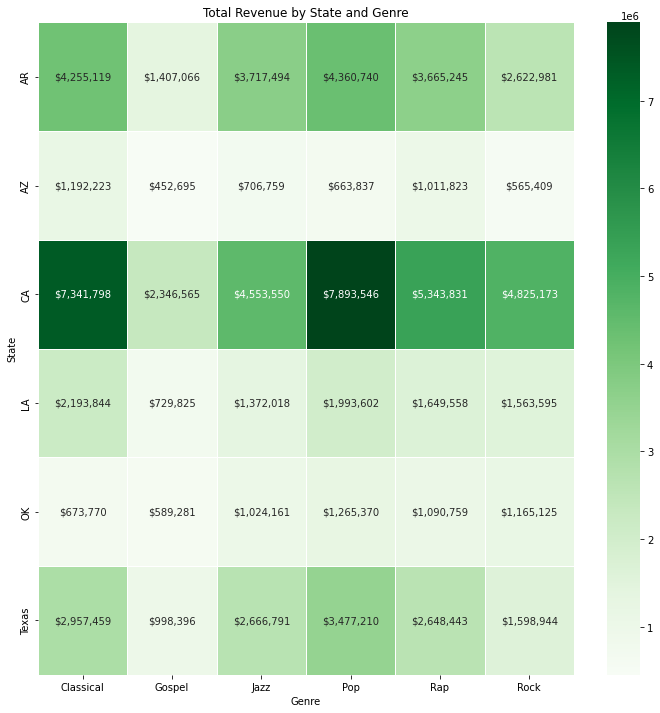

In [21]:
import seaborn as sns #offers additional plots that are not available int matplotlib

#Create Pivot Table
pivot_table = pd.pivot_table(df,
                             values='TotalRev',
                             index='State_Abbr',
                             columns='Genre',
                             aggfunc=np.sum,
                             fill_value=0)
#Format to currency and round number to whole number
formatted_pivot_table = pivot_table.applymap(lambda x: f"${int(x):,}")

# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, annot=formatted_pivot_table.values, fmt="s", cmap="Greens", linewidths=.5)
plt.title("Total Revenue by State and Genre")
plt.xlabel("Genre")
plt.ylabel("State")
plt.show()



<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 5 - Using any image library of your choice, create a chart of your choice using your DataFrame.

 - this is your chance to be creative, I am excited to see your great work
 - you can use matplotlib, seaborn, ployly, or any other library you like
 - if you use something beyond these, you may have to insall the library before you use with pip (example below)
 - you can load in a different dataset into your DataFrame if you want
</div>   


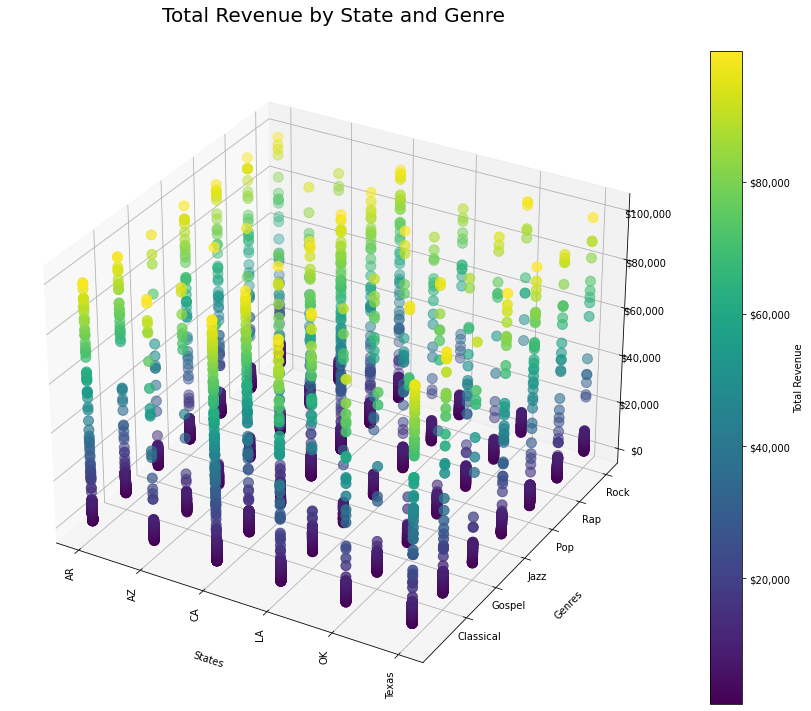

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

#CHATGPT HELPED ME WITH THIS
#just use csv as df
csv_file = "Band_Performances.csv"
df = pd.read_csv(csv_file)

# Map states and genres to numerical values
states = df['State_Abbr'].astype('category').cat.codes
genres = df['Genre'].astype('category').cat.codes
revenue = df['TotalRev']

# Create the figure and 3D axis
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Add title to the plot
ax.set_title('Total Revenue by State and Genre', pad=30, fontsize=20)

# Create a scatter plot
sc = ax.scatter(states, genres, revenue, c=revenue, cmap='viridis', s=100)

# Add color bar and format it to show as currency
cbar = plt.colorbar(sc)
cbar.set_label('Total Revenue')
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Label axes
ax.set_xlabel('States', labelpad=20)
ax.set_ylabel('Genres', labelpad=20)
ax.set_zlabel('Total Revenue', labelpad=50)  # Increased padding for z-axis label

# Format z-axis to show as currency
ax.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Set ticks with labels
ax.set_xticks(range(len(df['State_Abbr'].astype('category').cat.categories)))
ax.set_xticklabels(df['State_Abbr'].astype('category').cat.categories, rotation=90)

ax.set_yticks(range(len(df['Genre'].astype('category').cat.categories)))
ax.set_yticklabels(df['Genre'].astype('category').cat.categories)

# Show plot
plt.show()






